In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (9,6)
%config InlineBackend.figure_format = 'retina'
plt.rc('pdf', fonttype=42)
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['font.serif'] = 'Times'
plt.rcParams['font.family'] = 'serif'

In [3]:
import pandas as pd

In [9]:
df = pd.read_csv('../results/model_params_and_results.csv')

In [10]:
df['score'] = [abs(x) for x in df['score']]

In [11]:
df

,num_hidden_layers,hidden_layer_size,activation_function,score
0,0,0,linear,2.584747
1,0,0,relu,7.227311
2,0,0,sigmoid,3.625803
3,0,0,tanh,3.625803
4,1,64,linear,0.289578
5,1,64,relu,0.497862
6,1,64,sigmoid,0.297948
7,1,64,tanh,0.310448
8,1,128,linear,0.279975
9,1,128,relu,0.259806


# Plotting the results in a more interpretable fashion

# Number of hidden layers

<Container object of 3 artists>

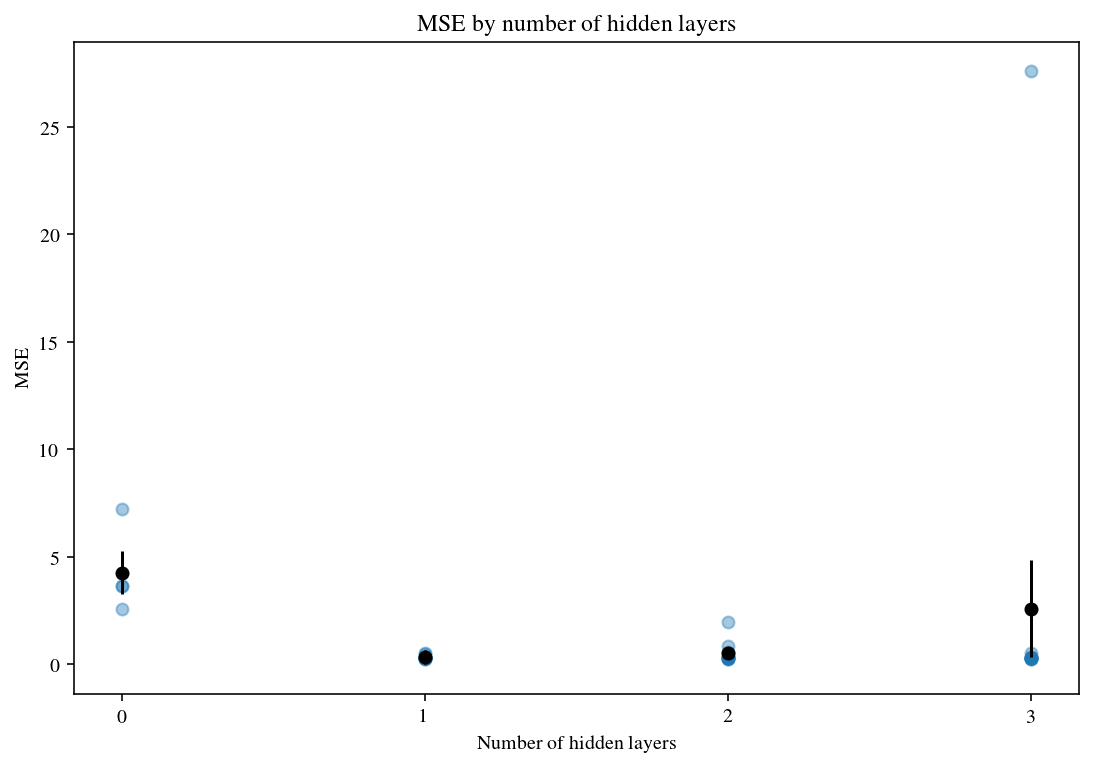

In [125]:
x = [0, 1, 2, 3]
y = [df.query('num_hidden_layers == 0')['score'].mean(), 
    df.query('num_hidden_layers == 1')['score'].mean(),
                      df.query('num_hidden_layers == 2')['score'].mean(),
                      df.query('num_hidden_layers == 3')['score'].mean()]
e = [df.query('num_hidden_layers == 0')['score'].sem(),
     df.query('num_hidden_layers == 1')['score'].mean(),
                      df.query('num_hidden_layers == 2')['score'].sem(),
                      df.query('num_hidden_layers == 3')['score'].sem()]
plt.scatter(df['num_hidden_layers'], df['score'], alpha=0.4)
plt.xticks([0,1,2,3])
plt.xlabel("Number of hidden layers")
plt.ylabel("MSE")
plt.title('MSE by number of hidden layers')
plt.errorbar(x, y, yerr=e, fmt='o', color='black')

Some of these results are skewed due to outlier values with high MSE scores. Removing all values with MSE > 1 for a clearer picture of the results.

In [122]:
df_ = df[df['score'] <= 1.0]

<Container object of 3 artists>

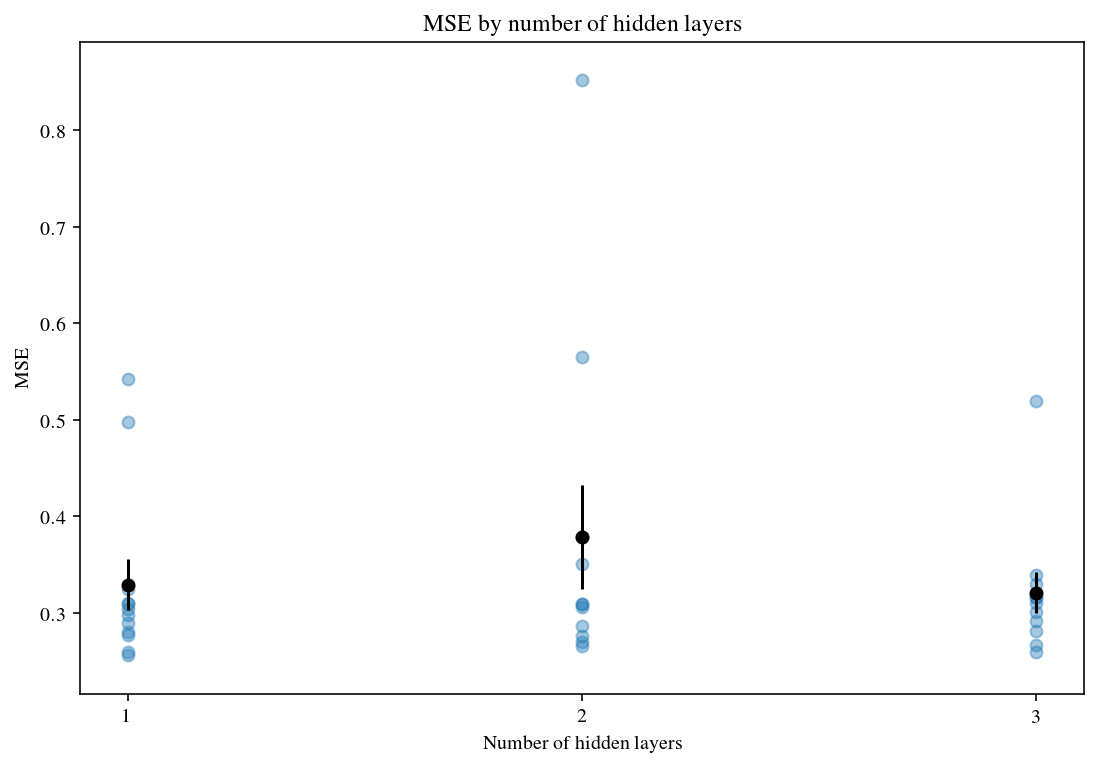

In [124]:
x = [1, 2, 3]
y = [df_.query('num_hidden_layers == 1')['score'].mean(),
                      df_.query('num_hidden_layers == 2')['score'].mean(),
                      df_.query('num_hidden_layers == 3')['score'].mean()]
e = [df_.query('num_hidden_layers == 1')['score'].sem(),
                      df_.query('num_hidden_layers == 2')['score'].sem(),
                      df_.query('num_hidden_layers == 3')['score'].sem()]
plt.scatter(df_['num_hidden_layers'], df_['score'], alpha=0.4)
plt.xticks([1,2,3])
plt.xlabel("Number of hidden layers")
plt.ylabel("MSE")
plt.title('MSE by number of hidden layers')
plt.errorbar(x, y, yerr=e, fmt='o', color='black')

# Hidden layer size

Without removing MSE > 1

In [126]:
hidden_layer_size_map = {0:0, 64:1, 128: 2, 256: 3}
df['hidden_layer_size_numeric'] = [hidden_layer_size_map[x] for x in list(df['hidden_layer_size'])]

<Container object of 3 artists>

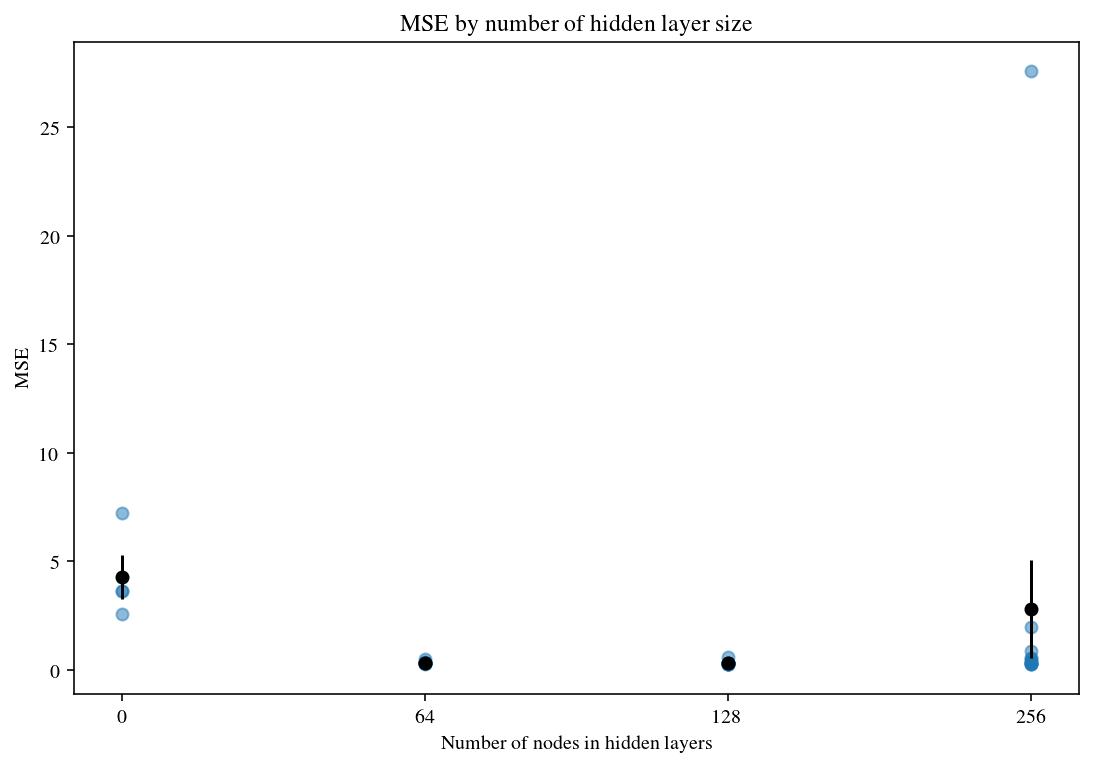

In [128]:
#fig, ax = plt.subplots()
# zero is again omitted
x = [0, 1, 2, 3]
y = [df.query('hidden_layer_size == 0')['score'].mean(),
     df.query('hidden_layer_size == 64')['score'].mean(),
            df.query('hidden_layer_size == 128')['score'].mean(),
            df.query('hidden_layer_size == 256')['score'].mean()]
e = [df.query('hidden_layer_size == 0')['score'].sem(),
    df.query('hidden_layer_size == 64')['score'].sem(),
            df.query('hidden_layer_size == 128')['score'].sem(),
            df.query('hidden_layer_size == 256')['score'].sem()]
plt.scatter(df['hidden_layer_size_numeric'], df['score'], alpha=0.5)
plt.xticks( range(4), ('0','64','128', '256'))
plt.xlabel("Number of nodes in hidden layers")
plt.ylabel("MSE")
plt.title("MSE by number of hidden layer size")
plt.errorbar(x, y, yerr=e, fmt='o', color='black')

In [77]:
hidden_layer_size_map = {64:0, 128: 1, 256: 2}
df_['hidden_layer_size_numeric'] = [hidden_layer_size_map[x] for x in list(df_['hidden_layer_size'])]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<Container object of 3 artists>

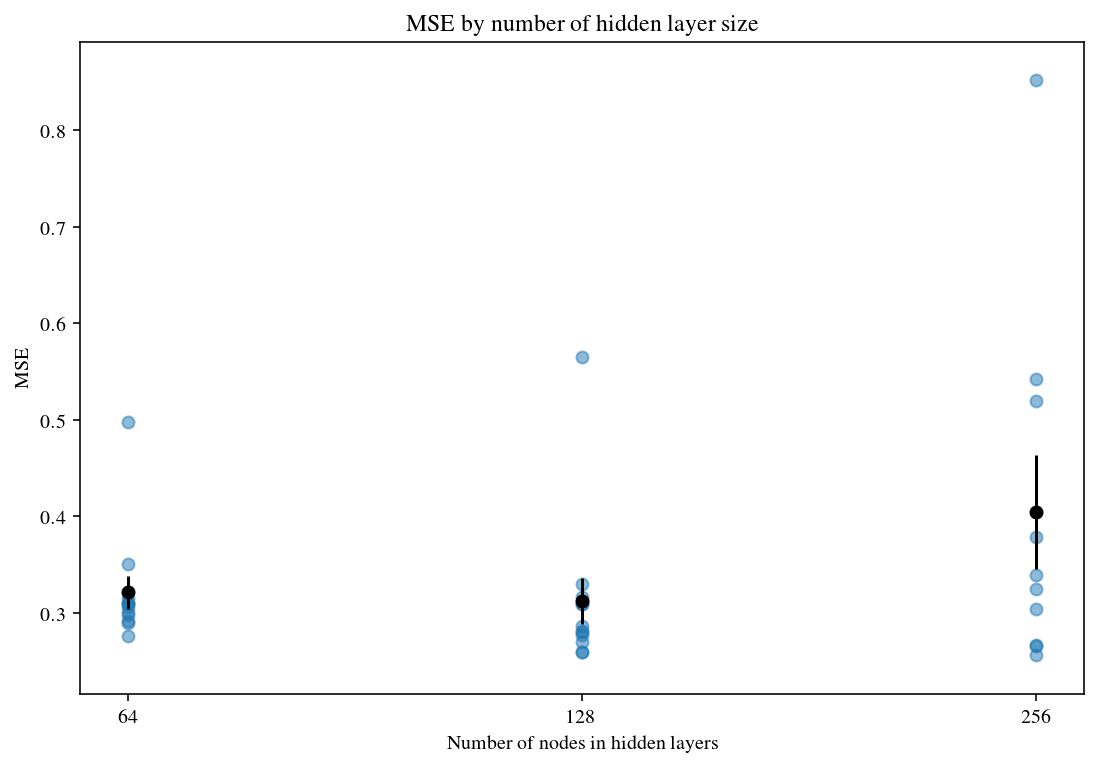

In [119]:
#fig, ax = plt.subplots()
# zero is again omitted
x = [0, 1, 2]
y = [df_.query('hidden_layer_size == 64')['score'].mean(),
            df_.query('hidden_layer_size == 128')['score'].mean(),
            df_.query('hidden_layer_size == 256')['score'].mean()]
e = [df_.query('hidden_layer_size == 64')['score'].sem(),
            df_.query('hidden_layer_size == 128')['score'].sem(),
            df_.query('hidden_layer_size == 256')['score'].sem()]
plt.scatter(df_['hidden_layer_size_numeric'], df_['score'], alpha=0.5)
plt.xticks( range(3), ('64','128', '256'))
plt.xlabel("Number of nodes in hidden layers")
plt.ylabel("MSE")
plt.title("MSE by number of hidden layer size")
plt.errorbar(x, y, yerr=e, fmt='o', color='black')

# Activation function

In [133]:
activation_function_map = {'linear':0, 'sigmoid': 1, 'tanh': 2, 'relu': 3}
df['activation_function_numeric'] = [activation_function_map[x] for x in list(df['activation_function'])]
df_['activation_function_numeric'] = [activation_function_map[x] for x in list(df_['activation_function'])]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<Container object of 3 artists>

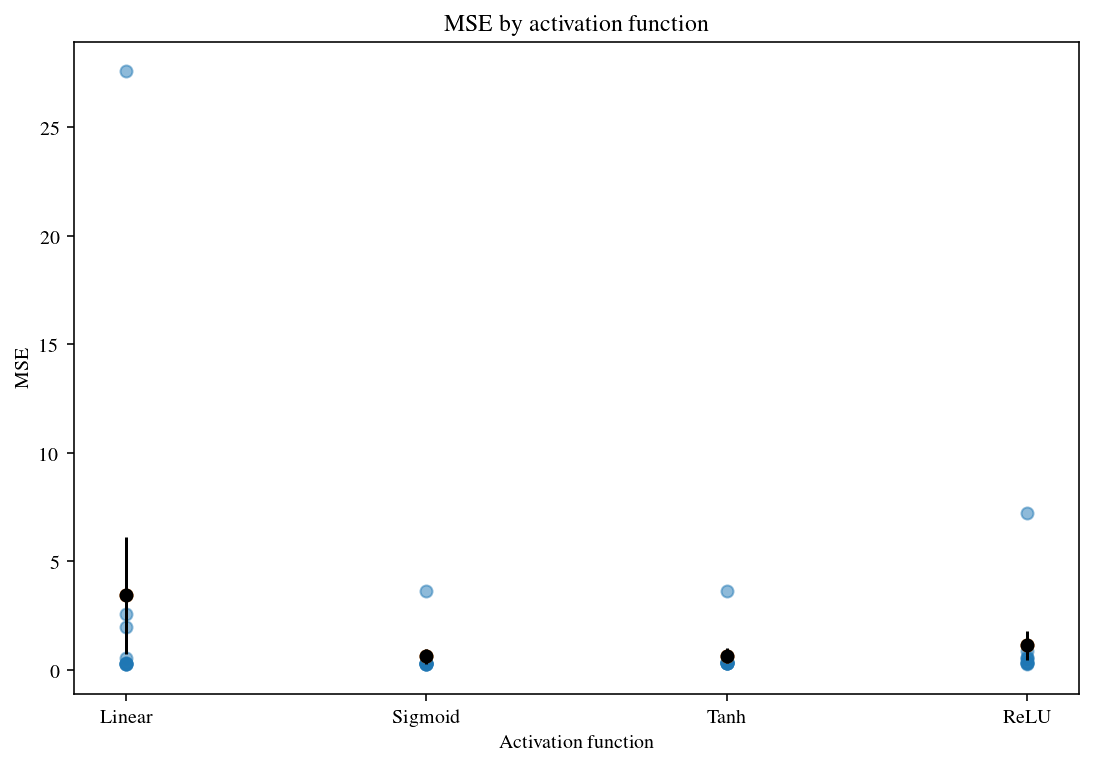

In [134]:
x = [0, 1, 2, 3]
y = [df.query('activation_function == "linear"')['score'].mean(),
            df.query('activation_function == "sigmoid"')['score'].mean(),
            df.query('activation_function == "tanh"')['score'].mean(),
            df.query('activation_function == "relu"')['score'].mean()]
e = [df.query('activation_function == "linear"')['score'].sem(),
            df.query('activation_function == "sigmoid"')['score'].sem(),
            df.query('activation_function == "tanh"')['score'].sem(),
            df.query('activation_function == "relu"')['score'].sem()]

plt.scatter(df['activation_function_numeric'], df['score'], alpha=0.5)
plt.scatter(pd.DataFrame([0,1,2,3]), 
            [df.query('activation_function == "linear"')['score'].mean(),
            df.query('activation_function == "sigmoid"')['score'].mean(),
            df.query('activation_function == "tanh"')['score'].mean(),
            df.query('activation_function == "relu"')['score'].mean()])
plt.xticks( range(4), ('Linear','Sigmoid', 'Tanh', 'ReLU',''))
plt.xlabel("Number of nodes in hidden layers")
plt.xlabel("Activation function")
plt.ylabel("MSE")
plt.title("MSE by activation function")
plt.errorbar(x, y, yerr=e, fmt='o', color='black')

<Container object of 3 artists>

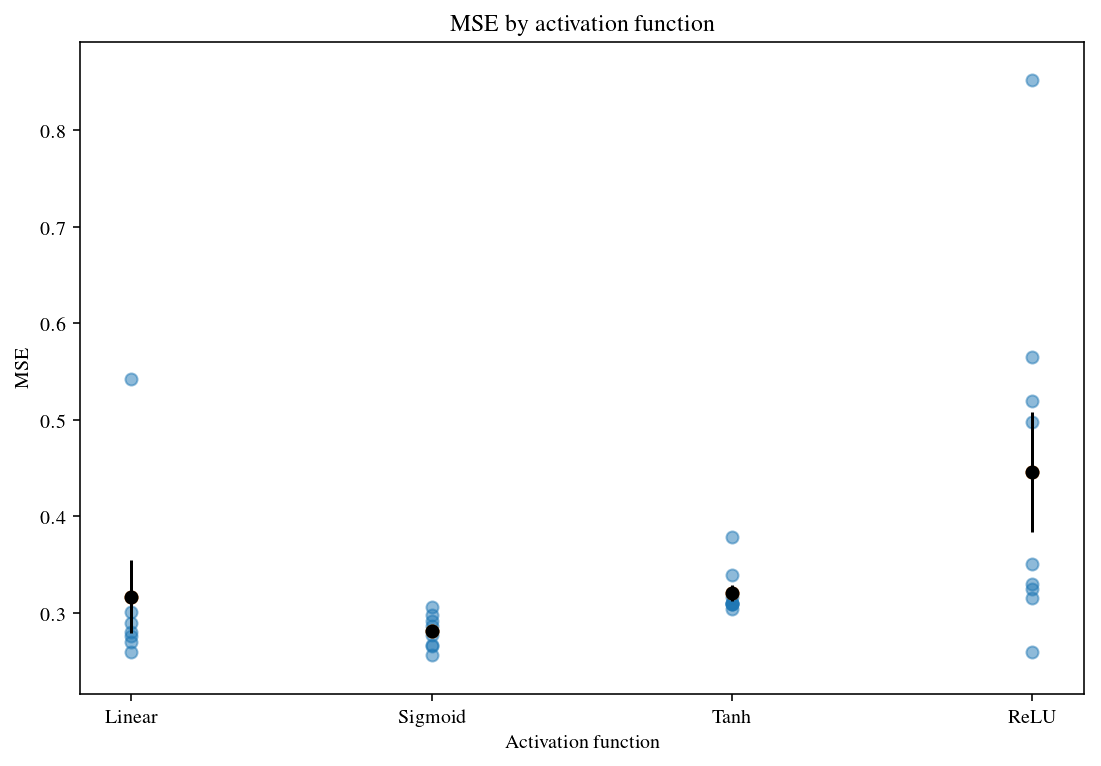

In [132]:
#fig, ax = plt.subplots()
# zero is again omitted
#fig, ax = plt.subplots()
# zero is again omitted
x = [0, 1, 2, 3]
y = [df_.query('activation_function == "linear"')['score'].mean(),
            df_.query('activation_function == "sigmoid"')['score'].mean(),
            df_.query('activation_function == "tanh"')['score'].mean(),
            df_.query('activation_function == "relu"')['score'].mean()]
e = [df_.query('activation_function == "linear"')['score'].sem(),
            df_.query('activation_function == "sigmoid"')['score'].sem(),
            df_.query('activation_function == "tanh"')['score'].sem(),
            df_.query('activation_function == "relu"')['score'].sem()]

plt.scatter(df_['activation_function_numeric'], df_['score'], alpha=0.5)
plt.scatter(pd.DataFrame([0,1,2,3]), 
            [df_.query('activation_function == "linear"')['score'].mean(),
            df_.query('activation_function == "sigmoid"')['score'].mean(),
            df_.query('activation_function == "tanh"')['score'].mean(),
            df_.query('activation_function == "relu"')['score'].mean()])
plt.xticks( range(4), ('Linear','Sigmoid', 'Tanh', 'ReLU',''))
plt.xlabel("Number of nodes in hidden layers")
plt.xlabel("Activation function")
plt.ylabel("MSE")
plt.title("MSE by activation function")
plt.errorbar(x, y, yerr=e, fmt='o', color='black')

Overall we see much narrower error bars for the sigmoid and tanh activations, suggesting that they tend to perform much more consistently. 